# Starbucks Beverages & Nutrition

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [4]:
# Read csv file

df = pd.read_csv('Data/starbucks_drinkMenu_expanded.csv')
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [5]:
# Print panadas profile report

profile = ProfileReport(df, title = "Pandas Profiling Report")
profile.to_widgets()

In [111]:
# Pandas profile report shows that some numerical categories are being interpreted improperly as categorical instead of numerical
# Checks the category types for each column again

df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [113]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [ ]:
# Changes the object data types to numerical values

df['Vitamin A ']

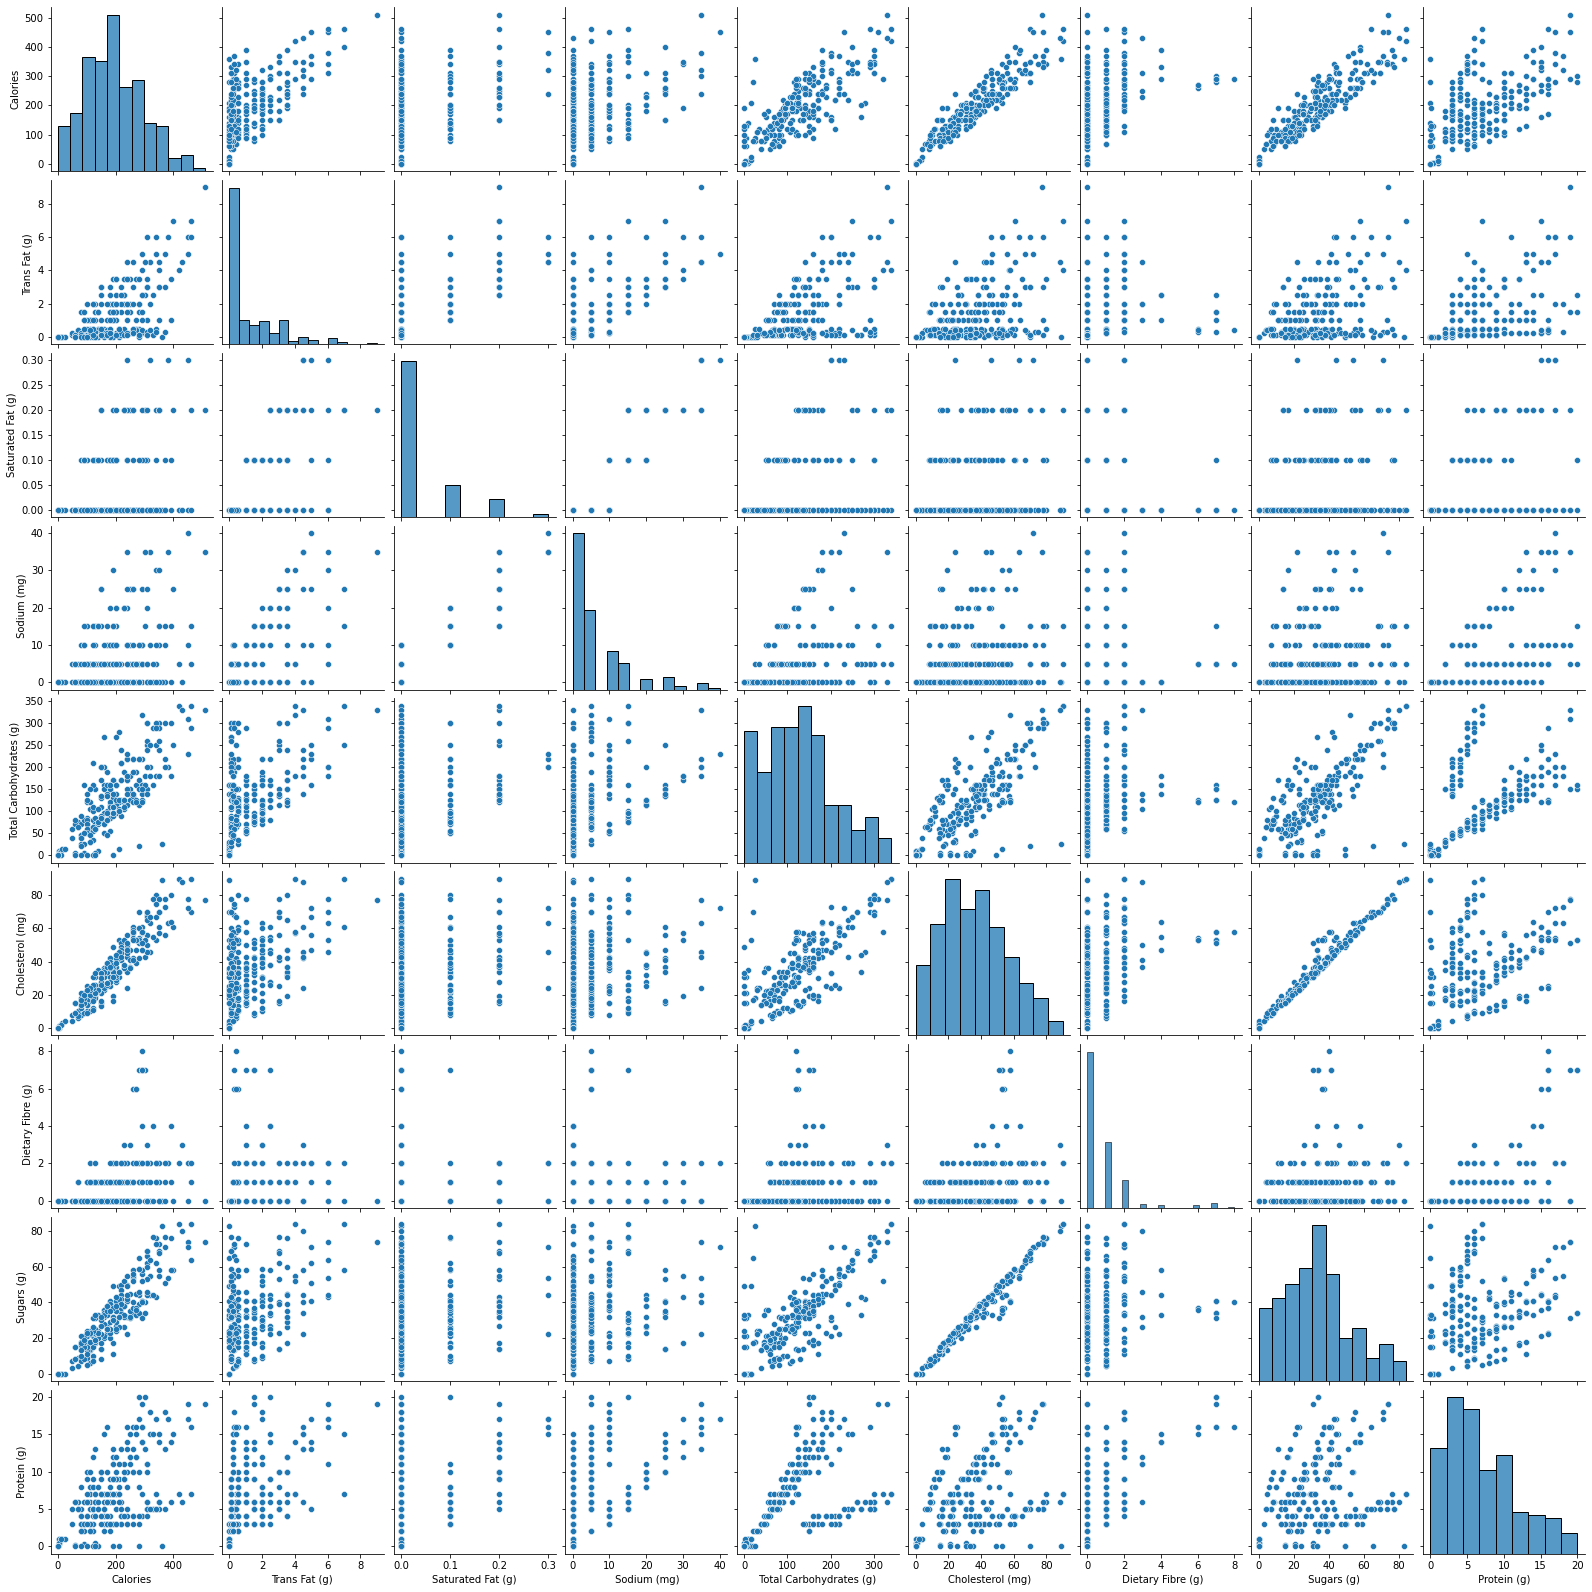

In [7]:
# Creates a seaborn pairplot for several numeric variables

sns.pairplot(df)
plt.show()

# Q: Which nutritional categories are closely correlated and not closely correlated and why?

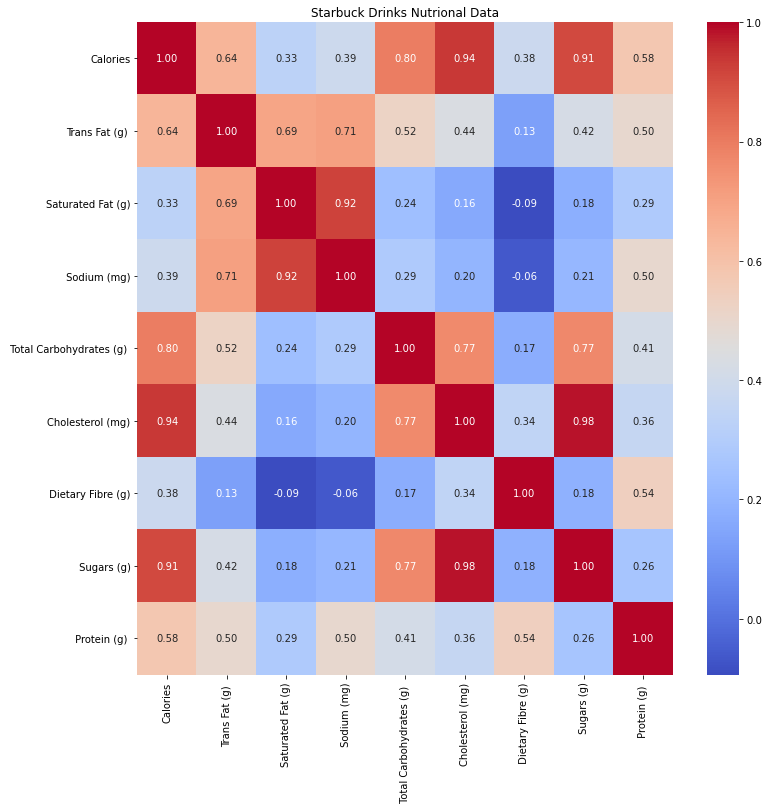

In [8]:
# Visualizes the relationships between several numerical attributes of each song using a correlation matrix heatmap

plt.figure(figsize=(12,12)) 
hm = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f') 
plt.title('Starbuck Drinks Nutrional Data') 
plt.show()

A:  
The following are highly correlated at > 0.6:
- Calories & cholesterol(mg): 0.94, sugars(g): 0.91, trans fat(g): 0.64, total carbohydrates(g): 0.80
- Trans Fat & Saturated Fat(g): 0.69, sodium(mg): 0.71
- Saturated Fat(g) & Sodium (mg): 0.92
- Total carbohydrates(g) & sugars(g): 0.77, cholesterol(mg): 0.77

The following are not highly correlated at < 0.0:
- Dietary Fibre(g) & Saturated Fat(g): -0.09, Sodium(mg): -0.06

Ingredients like trans & saturated fats, sugars, sodium , and cholesterol in large amounts usually go hand in hand in unhealthy strabucks drinks and thus it would make sense to see a strong correlation between there ingredients. Dietary fibre and saturated fat and sodium do not have a clear link between one another in food and beverages and thus would make sense if they were not found to be stringly correlated ingredients in the menu of beverages


# Q: What are the statistical details of the menu grouped by Beverage Category,  Beverage, and Beverage Prep in the menu?

In [30]:
# Stats by beverage category, beverage, and beverage prep

df.groupby(['Beverage_category', 'Beverage', 'Beverage_prep']).describe()

Calories  \
                                                                   count   
Beverage_category       Beverage              Beverage_prep                
Classic Espresso Drinks Caffè Americano       Grande                 1.0   
                                              Short                  1.0   
                                              Tall                   1.0   
                                              Venti                  1.0   
                        Caffè Latte           2% Milk                4.0   
...                                                                  ...   
Tazo® Tea Drinks        Tazo® Green Tea Latte Venti Nonfat Milk      1.0   
                        Tazo® Tea             Grande                 1.0   
                                              Short                  1.0   
                                              Tall                   1.0   
                                              Venti                  1.0   

                                                                        \
                                                                  mean   
Beverage_category       Beverage              Beverage_prep              
Classic Espresso Drinks Caffè Americano       Grande              15.0   
                                              Short                5.0   
                                              Tall                10.0   
                                              Venti               25.0   
                        Caffè Latte           2% Milk            170.0   
...                                                                ...   
Tazo® Tea Drinks        Tazo® Green Tea Latte Venti Nonfat Milk  370.0   
                        Tazo® Tea             Grande               0.0   
                                              Short                0.0   
                                              Tall                 0.0   
                                              Venti                0.0   

                                                                            \
                                                                       std   
Beverage_category       Beverage              Beverage_prep                  
Classic Espresso Drinks Caffè Americano       Grande                   NaN   
                                              Short                    NaN   
                                              Tall                     NaN   
                                              Venti                    NaN   
                        Caffè Latte           2% Milk            59.441848   
...                                                                    ...   
Tazo® Tea Drinks        Tazo® Green Tea Latte Venti Nonfat Milk        NaN   
                        Tazo® Tea             Grande                   NaN   
                                              Short                    NaN   
                                              Tall                     NaN   
                                              Venti                    NaN   

                                                                               \
                                                                   min    25%   
Beverage_category       Beverage              Beverage_prep                     
Classic Espresso Drinks Caffè Americano       Grande              15.0   15.0   
                                              Short                5.0    5.0   
                                              Tall                10.0   10.0   
                                              Venti               25.0   25.0   
                        Caffè Latte           2% Milk            100.0  137.5   
...                                                                ...    ...   
Tazo® Tea Drinks        Tazo® Green Tea Latte Venti Nonfat Milk  370.0  370.0   
                        Tazo® Tea             Grande       

In [29]:
# Stats by beverage category and beverage

df.groupby(['Beverage_category', 'Beverage']).describe()

Calories  \
                                                                                        count   
Beverage_category                 Beverage                                                      
Classic Espresso Drinks           Caffè Americano                                         4.0   
                                  Caffè Latte                                            12.0   
                                  Caffè Mocha (Without Whipped Cream)                    12.0   
                                  Cappuccino                                             12.0   
                                  Espresso                                                2.0   
                                  Skinny Latte (Any Flavour)                              4.0   
                                  Vanilla Latte (Or Other Flavoured Latte)               12.0   
Coffee                            Brewed Coffee                                           4.0   
Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)                         9.0   
                                  Coffee                                                  9.0   
                                  Java Chip (Without Whipped Cream)                       9.0   
                                  Mocha (Without Whipped Cream)                           9.0   
Frappuccino® Blended Crème        Strawberries & Crème (Without Whipped Cream)            9.0   
                                  Vanilla Bean (Without Whipped Cream)                    4.0   
Frappuccino® Light Blended Coffee Caramel                                                 3.0   
                                  Coffee                                                  3.0   
                                  Java Chip                                               3.0   
                                  Mocha                                                   3.0   
Shaken Iced Beverages             Iced Brewed Coffee (With Classic Syrup)                 3.0   
                                  Iced Brewed Coffee (With Milk & Classic Syrup)          9.0   
                                  Shaken Iced Tazo® Tea (With Classic Syrup)              3.0   
                                  Shaken Iced Tazo® Tea Lemonade (With Classic Sy...      3.0   
Signature Espresso Drinks         Caramel Apple Spice (Without Whipped Cream)             4.0   
                                  Caramel Macchiato                                      12.0   
                                  Hot Chocolate (Without Whipped Cream)                  12.0   
                                  White Chocolate Mocha (Without Whipped Cream)          12.0   
Smoothies                         Banana Chocolate Smoothie                               3.0   
                                  Orange Mango Banana Smoothie                            3.0   
                                  Strawberry Banana Smoothie                              3.0   
Tazo® Tea Drinks                  Tazo® Chai Tea Latte                                   12.0   
                                  Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12.0   
                                  Tazo® Full-Leaf Tea Latte                              12.0   
                                  Tazo® Green Tea Latte                                  12.0   
                                  Tazo® Tea                                               4.0   

                                                                                                  \
                                                                                            mean   
Beverage_category                 Beverage                                                         
Classic Espresso Drinks           Caffè Americano                                      13.750000   
                                  Caffè Latte                                         139.16666

In [36]:
# Stats by beverage category

df.groupby(['Beverage_category']).describe()

Calories                                 \
                                     count        mean         std    min   
Beverage_category                                                           
Classic Espresso Drinks               58.0  140.172414   82.323525    5.0   
Coffee                                 4.0    4.250000    0.957427    3.0   
Frappuccino® Blended Coffee           36.0  276.944444   81.339481  160.0   
Frappuccino® Blended Crème            13.0  233.076923   61.696112  170.0   
Frappuccino® Light Blended Coffee     12.0  162.500000   58.329004   90.0   
Shaken Iced Beverages                 18.0  114.444444   39.589396   60.0   
Signature Espresso Drinks             40.0  250.000000  103.205049  100.0   
Smoothies                              9.0  282.222222   13.017083  260.0   
Tazo® Tea Drinks                      52.0  177.307692   98.041915    0.0   

                                                               Trans Fat (g)   \
                                      25%    50%    75%    max          count   
Beverage_category                                                               
Classic Espresso Drinks             82.50  125.0  197.5  340.0           58.0   
Coffee                               3.75    4.5    5.0    5.0            4.0   
Frappuccino® Blended Coffee        215.00  270.0  340.0  460.0           36.0   
Frappuccino® Blended Crème         180.00  230.0  260.0  350.0           13.0   
Frappuccino® Light Blended Coffee  117.50  150.0  202.5  290.0           12.0   
Shaken Iced Beverages               82.50  110.0  130.0  190.0           18.0   
Signature Espresso Drinks          180.00  240.0  312.5  510.0           40.0   
Smoothies                          270.00  290.0  290.0  300.0            9.0   
Tazo® Tea Drinks                   120.00  170.0  230.0  450.0           52.0   

                                             ...  Sugars (g)        \
                                       mean  ...         75%   max   
Beverage_category                            ...                     
Classic Espresso Drinks            1.210345  ...       26.00  45.0   
Coffee                             0.000000  ...        0.00   0.0   
Frappuccino® Blended Coffee        1.700000  ...       70.00  84.0   
Frappuccino® Blended Crème         0.769231  ...       55.00  69.0   
Frappuccino® Light Blended Coffee  0.900000  ...       39.75  52.0   
Shaken Iced Beverages              0.138889  ...       32.50  49.0   
Signature Espresso Drinks          2.712500  ...       49.50  83.0   
Smoothies                          0.933333  ...       40.00  41.0   
Tazo® Tea Drinks                   0.859615  ...       39.25  71.0   

                                   Protein (g)                              \
                                          count       mean       std   min   
Beverage_category                                                            
Classic Espresso Drinks                    58.0   8.686207  4.371376   0.4   
Coffee                                      4.0   0.700000  0.355903   0.3   
Frappuccino® Blended Coffee                36.0   4.222222  1.396140   2.0   
Frappuccino® Blended Crème                 13.0   4.000000  1.154701   3.0   
Frappuccino® Light Blended Coffee          12.0   4.250000  1.356801   3.0   
Shaken Iced Beverages                      18.0   1.344444  1.388703   0.0   
Signature Espresso Drinks                  40.0   9.875000  5.115023   0.0   
Smoothies                                   9.0  17.111111  1.964971  15.0   
Tazo® Tea Drinks                           52.0   6.807692  3.970669   0.0   

                                                              
                                     25%    50%    75%   max  
Beverage_category                                             
Classic Espresso Drinks             6.00   9.00  12.00  17.0  
Coffee                              0.45   0.75   1.00   1.0  
Frappuccino® Blended Coffee         3.00   

In [45]:
# Stats by beverage

df.groupby(['Beverage']).describe()

Calories              \
                                                      count        mean   
Beverage                                                                  
Banana Chocolate Smoothie                               3.0  290.000000   
Brewed Coffee                                           4.0    4.250000   
Caffè Americano                                         4.0   13.750000   
Caffè Latte                                            12.0  139.166667   
Caffè Mocha (Without Whipped Cream)                    12.0  210.000000   
Cappuccino                                             12.0   90.000000   
Caramel                                                 3.0  150.000000   
Caramel (Without Whipped Cream)                         9.0  268.888889   
Caramel Apple Spice (Without Whipped Cream)             4.0  247.500000   
Caramel Macchiato                                      12.0  184.166667   
Coffee                                                 12.0  210.000000   
Espresso                                                2.0    7.500000   
Hot Chocolate (Without Whipped Cream)                  12.0  236.666667   
Iced Brewed Coffee (With Classic Syrup)                 3.0   93.333333   
Iced Brewed Coffee (With Milk & Classic Syrup)          9.0  122.222222   
Java Chip                                               3.0  220.000000   
Java Chip (Without Whipped Cream)                       9.0  327.777778   
Mocha                                                   3.0  156.666667   
Mocha (Without Whipped Cream)                           9.0  272.222222   
Orange Mango Banana Smoothie                            3.0  266.666667   
Shaken Iced Tazo® Tea (With Classic Syrup)              3.0   86.666667   
Shaken Iced Tazo® Tea Lemonade (With Classic Sy...      3.0  140.000000   
Skinny Latte (Any Flavour)                              4.0  110.000000   
Strawberries & Crème (Without Whipped Cream)            9.0  248.888889   
Strawberry Banana Smoothie                              3.0  290.000000   
Tazo® Chai Tea Latte                                   12.0  196.666667   
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12.0  148.333333   
Tazo® Full-Leaf Tea Latte                              12.0  148.333333   
Tazo® Green Tea Latte                                  12.0  275.000000   
Tazo® Tea                                               4.0    0.000000   
Vanilla Bean (Without Whipped Cream)                    4.0  197.500000   
Vanilla Latte (Or Other Flavoured Latte)               12.0  195.833333   
White Chocolate Mocha (Without Whipped Cream)          12.0  330.000000   

                                                                               \
                                                           std    min     25%   
Beverage                                                                        
Banana Chocolate Smoothie                            10.000000  280.0  285.00   
Brewed Coffee                                         0.957427    3.0    3.75   
Caffè Americano                                       8.539126    5.0    8.75   
Caffè Latte                                          52.303022   70.0  100.00   
Caffè Mocha (Without Whipped Cream)                  73.977884  110.0  160.00   
Cappuccino                                           31.042493   50.0   67.50   
Caramel                                              50.000000  100.0  125.00   
Caramel (Without Whipped Cream)                      70.612401  180.0  200.00   
Caramel Apple Spice (Without Whipped Cream)          94.295634  140.0  192.50   
Caramel Macchiato                                    64.449887  100.0  135.00   
Coffee                                               80.678937   90.0  160.00   
Espresso                                              3.535534    5.0    6.25   
Hot Chocolate (Without Whipped Cream)                81.501069  130.0  180.00   
Iced Brewed Coffee (With Classic Syrup)              3

In [46]:
# Stats by beverage category

df.groupby(['Beverage_category']).describe()

Calories                                 \
                                     count        mean         std    min   
Beverage_category                                                           
Classic Espresso Drinks               58.0  140.172414   82.323525    5.0   
Coffee                                 4.0    4.250000    0.957427    3.0   
Frappuccino® Blended Coffee           36.0  276.944444   81.339481  160.0   
Frappuccino® Blended Crème            13.0  233.076923   61.696112  170.0   
Frappuccino® Light Blended Coffee     12.0  162.500000   58.329004   90.0   
Shaken Iced Beverages                 18.0  114.444444   39.589396   60.0   
Signature Espresso Drinks             40.0  250.000000  103.205049  100.0   
Smoothies                              9.0  282.222222   13.017083  260.0   
Tazo® Tea Drinks                      52.0  177.307692   98.041915    0.0   

                                                               Trans Fat (g)   \
                                      25%    50%    75%    max          count   
Beverage_category                                                               
Classic Espresso Drinks             82.50  125.0  197.5  340.0           58.0   
Coffee                               3.75    4.5    5.0    5.0            4.0   
Frappuccino® Blended Coffee        215.00  270.0  340.0  460.0           36.0   
Frappuccino® Blended Crème         180.00  230.0  260.0  350.0           13.0   
Frappuccino® Light Blended Coffee  117.50  150.0  202.5  290.0           12.0   
Shaken Iced Beverages               82.50  110.0  130.0  190.0           18.0   
Signature Espresso Drinks          180.00  240.0  312.5  510.0           40.0   
Smoothies                          270.00  290.0  290.0  300.0            9.0   
Tazo® Tea Drinks                   120.00  170.0  230.0  450.0           52.0   

                                             ...  Sugars (g)        \
                                       mean  ...         75%   max   
Beverage_category                            ...                     
Classic Espresso Drinks            1.210345  ...       26.00  45.0   
Coffee                             0.000000  ...        0.00   0.0   
Frappuccino® Blended Coffee        1.700000  ...       70.00  84.0   
Frappuccino® Blended Crème         0.769231  ...       55.00  69.0   
Frappuccino® Light Blended Coffee  0.900000  ...       39.75  52.0   
Shaken Iced Beverages              0.138889  ...       32.50  49.0   
Signature Espresso Drinks          2.712500  ...       49.50  83.0   
Smoothies                          0.933333  ...       40.00  41.0   
Tazo® Tea Drinks                   0.859615  ...       39.25  71.0   

                                   Protein (g)                              \
                                          count       mean       std   min   
Beverage_category                                                            
Classic Espresso Drinks                    58.0   8.686207  4.371376   0.4   
Coffee                                      4.0   0.700000  0.355903   0.3   
Frappuccino® Blended Coffee                36.0   4.222222  1.396140   2.0   
Frappuccino® Blended Crème                 13.0   4.000000  1.154701   3.0   
Frappuccino® Light Blended Coffee          12.0   4.250000  1.356801   3.0   
Shaken Iced Beverages                      18.0   1.344444  1.388703   0.0   
Signature Espresso Drinks                  40.0   9.875000  5.115023   0.0   
Smoothies                                   9.0  17.111111  1.964971  15.0   
Tazo® Tea Drinks                           52.0   6.807692  3.970669   0.0   

                                                              
                                     25%    50%    75%   max  
Beverage_category                                             
Classic Espresso Drinks             6.00   9.00  12.00  17.0  
Coffee                              0.45   0.75   1.00   1.0  
Frappuccino® Blended Coffee         3.00   

# Q: What are the unique categories of Beverage Categories, Beverages, and Beverage Preps?

In [100]:
# Finds list of unique beverage categories

print('Unique Beverage Categories: \n', df['Beverage_category'].unique(), '\n')

Unique Beverage Categories: 
 ['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème'] 



In [99]:
# Finds list of unique beverages

print('Unique Beverages: \n', df['Beverage'].unique(), '\n')

Unique Beverages: 
 ['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo® Tea'
 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo® Tea (With Classic Syrup)'
 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)'
 'Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry Banana Smoothie' 'Coffee' 'Mocha (Without Whipped Cream)'
 'Caramel (Without Whipped Cream)' 'Java Chip (Without Whipped Cream)'
 'Mocha' 'Caramel' 'Java Chip'
 'Strawberries & Crème (Without Whipped Cream)'
 'Vanilla Bean (Without

In [101]:
# Finds list of unique beverage prep

print('Unique Beverage Preps: \n', df['Beverage_prep'].unique())

Unique Beverage Preps: 
 ['Short' 'Tall' 'Grande' 'Venti' 'Short Nonfat Milk' '2% Milk' 'Soymilk'
 'Tall Nonfat Milk' 'Grande Nonfat Milk' 'Venti Nonfat Milk' 'Solo'
 'Doppio' 'Whole Milk']


# Q: Starbucks has how many beverage_prep in each beverage category, beverage, and across all in the menu ?

In [103]:
# Checks the count of beverage preps in each type of beverage category

print(df.groupby(['Beverage_category']).agg({'Beverage_prep': ['count']}))

                                  Beverage_prep
                                          count
Beverage_category                              
Classic Espresso Drinks                      58
Coffee                                        4
Frappuccino® Blended Coffee                  36
Frappuccino® Blended Crème                   13
Frappuccino® Light Blended Coffee            12
Shaken Iced Beverages                        18
Signature Espresso Drinks                    40
Smoothies                                     9
Tazo® Tea Drinks                             52


In [102]:
# Checks the count of beverage preps in each type of beverage

print(df.groupby(['Beverage']).agg({'Beverage_prep': ['count']}))

                                                   Beverage_prep
                                                           count
Beverage                                                        
Banana Chocolate Smoothie                                      3
Brewed Coffee                                                  4
Caffè Americano                                                4
Caffè Latte                                                   12
Caffè Mocha (Without Whipped Cream)                           12
Cappuccino                                                    12
Caramel                                                        3
Caramel (Without Whipped Cream)                                9
Caramel Apple Spice (Without Whipped Cream)                    4
Caramel Macchiato                                             12
Coffee                                                        12
Espresso                                                       2
Hot Chocolate (Without Wh

In [104]:
# Checks the count of all beverage preps

print(df.groupby(['Beverage_prep']).agg({'Beverage_prep': ['count']}))

                   Beverage_prep
                           count
Beverage_prep                   
2% Milk                       50
Doppio                         1
Grande                         7
Grande Nonfat Milk            26
Short                          4
Short Nonfat Milk             12
Solo                           1
Soymilk                       66
Tall                           7
Tall Nonfat Milk              23
Venti                          7
Venti Nonfat Milk             22
Whole Milk                    16


# Q: Which beverage category, beverage, & beverage prep are unhealthiest in terms of average sugar and trans fat levels in that order of importance?

In [96]:
# Gets the sorted list of unhealthiest to healthiest beverage categories based on sugar & trans fat levels
    
df.groupby('Beverage_category').mean()[[' Sugars (g)', 'Trans Fat (g) ']].sort_values([' Sugars (g)', 'Trans Fat (g) '], ascending = False)

,Sugars (g),Trans Fat (g)
Beverage_category,,
Frappuccino® Blended Coffee,57.083333,1.700000
Frappuccino® Blended Crème,48.461538,0.769231
Signature Espresso Drinks,38.600000,2.712500
Smoothies,36.777778,0.933333
Frappuccino® Light Blended Coffee,32.416667,0.900000
Tazo® Tea Drinks,30.307692,0.859615
Shaken Iced Beverages,26.000000,0.138889
Classic Espresso Drinks,16.965517,1.210345
Coffee,0.000000,0.000000


In [97]:
# Gets the sorted list of unhealthiest to healthiest beverage categories based on sugar & trans fat levels
    
df.groupby('Beverage').mean()[[' Sugars (g)', 'Trans Fat (g) ']].sort_values([' Sugars (g)', 'Trans Fat (g) '], ascending = False)

,Sugars (g),Trans Fat (g)
Beverage,,
Java Chip (Without Whipped Cream),62.444444,3.888889
Caramel (Without Whipped Cream),58.000000,0.822222
Caramel Apple Spice (Without Whipped Cream),57.500000,0.000000
Mocha (Without Whipped Cream),57.111111,1.266667
Strawberries & Crème (Without Whipped Cream),51.555556,0.844444
White Chocolate Mocha (Without Whipped Cream),49.166667,4.875000
Tazo® Green Tea Latte,45.083333,1.475000
Coffee,44.583333,0.633333
Vanilla Bean (Without Whipped Cream),41.500000,0.600000


In [98]:
# Gets the sorted list of unhealthiest to healthiest beverage categories based on sugar & trans fat levels
    
df.groupby('Beverage_prep').mean()[[' Sugars (g)', 'Trans Fat (g) ']].sort_values([' Sugars (g)', 'Trans Fat (g) '], ascending = False)

,Sugars (g),Trans Fat (g)
Beverage_prep,,
Whole Milk,55.687500,2.812500
Venti Nonfat Milk,50.045455,1.009091
Grande Nonfat Milk,38.615385,0.746154
Soymilk,31.848485,1.006061
2% Milk,30.980000,2.920000
Tall Nonfat Milk,28.521739,0.521739
Venti,27.714286,0.000000
Grande,20.000000,0.000000
Short Nonfat Milk,17.000000,0.441667


A: 
- Frappuccino® Blended Coffee is the unhealthiest beverage category in terms sugar and trans fat levels in that order of importance
- Java Chip (Without Whipped Cream)	is the unhelathiest beverage in terms of sugar and trans fat levels in that order of importance
- Whole Milk is the unhealthiest beverage prep in terms of sugar and trans fat levels in that order of importance

# Q: Which beverage category,  beverage,  & beverage prep are healthiest in terms of  Calcium & Iron average level in that order of importance?

In [109]:
# Gets the sorted list of healthiest to unhealthiest beverage categories based on calcium & iron levels
    
df.groupby('Beverage_category').mean()[[' Calcium (% DV) ', 'Iron (% DV) ']].sort_values([' Calcium (% DV) ', 'Iron (% DV) '], ascending = False)

In [ ]:
# Gets the sorted list of healthiest to unhealthiest beverages based on calcium & iron levels

df.groupby('Beverage').mean()[[' Calcium (% DV) ', 'Iron (% DV) ']].sort_values([' Calcium (% DV) ', 'Iron (% DV) '], ascending = False)

In [ ]:
# Gets the sorted list of healthiest to unhealthiest beverage preps based on calcium & iron levels
    
df.groupby('Beverage_prep').mean()[[' Calcium (% DV) ', 'Iron (% DV) ']].sort_values([' Calcium (% DV) ', 'Iron (% DV) '], ascending = False)

A:

- [] is the unhealthiest beverage category in terms of calcium and iron levels in that order of importance 
- [] is the unhelathiest beverage in terms of calcium and iron levels in that order of importance 
- [] is the unhealthiest beverage prep in terms of calcium and iron levels in that order of importance

# Q: (Hypothesis Testing)



In [ ]:
# df.groupby(df['Beverage_category']).describe()